In [171]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [172]:
def movingAverage(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


folder_path = r'E:\TMAZE_DATA'
file_pattern = '*.json' 
files = glob.glob(os.path.join(folder_path, file_pattern)) 
print(files)

['E:\\TMAZE_DATA\\data_BFZ1_20240807_161404.json', 'E:\\TMAZE_DATA\\data_BFZ1_20240807_164630.json', 'E:\\TMAZE_DATA\\data_BFZ1_20240807_171500.json', 'E:\\TMAZE_DATA\\data_BFZ3_20240807_182436.json', 'E:\\TMAZE_DATA\\data_BFZ2_20240808_110327.json', 'E:\\TMAZE_DATA\\data_BFZ2_20240808_114626.json', 'E:\\TMAZE_DATA\\data_BFZ2_20240808_115625.json', 'E:\\TMAZE_DATA\\data_BFZ3_20240808_124003.json', 'E:\\TMAZE_DATA\\data_BFZ3_20240808_130656.json', 'E:\\TMAZE_DATA\\data_BFZ1_20240808_135421.json', 'E:\\TMAZE_DATA\\data_BFZ1_20240808_141624.json', 'E:\\TMAZE_DATA\\data_BFZ1_20240808_143425.json', 'E:\\TMAZE_DATA\\data_BDY2_20240809_130628.json', 'E:\\TMAZE_DATA\\data_BDY2_20240809_131516.json', 'E:\\TMAZE_DATA\\data_BDY2_20240809_133059.json', 'E:\\TMAZE_DATA\\data_BDY2_20240809_134633.json', 'E:\\TMAZE_DATA\\data_TEST_20240809_143725.json', 'E:\\TMAZE_DATA\\data_BDY4_20240809_144712.json', 'E:\\TMAZE_DATA\\data_BDY4_20240809_151235.json', 'E:\\TMAZE_DATA\\data_BDY4_20240809_152813.json',

In [4]:
correctness = {}
correctness[trial6['coneHeight_2(floor2)']] = []
correctness[trial6['coneHeight_1(floor1)']] = []
correctness["0.0"] = []
correctness["1.5"] = []


if trial6['floorID'] == 'F,2':
    correctness[trial6['coneHeight_2(floor2)']].append(trial6['decision'])
elif trial6['floorID'] == 'F,1':
    correctness[trial6['coneHeight_1(floor1)']].append(trial6['decision'])
elif trial6['floorID'] == 'F,3':
    correctness["1.5"].append(trial6['decision'])
elif trial6['floorID'] == 'F,4':
    correctness["0.0"].append(trial6['decision'])

NameError: name 'trial6' is not defined

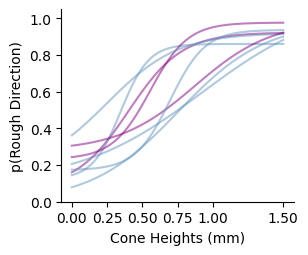

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the sigmoid function
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

def process_mouse_data(mouseID, files):
    list_of_files = [file for file in files if mouseID in file]

    list_of_decisions_for25 = []
    list_of_decisions_for75 = []
    list_of_decisions_for15 = []
    list_of_decisions_for5 = []
    list_of_decisions_for1 = []
    list_of_smooth_decisions = []
    list_of_smoothRS= []

    for sessionID, file in enumerate(list_of_files):

        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial+1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for75.append(trial_data["decision"])
                    #BDY mice 
                elif trial_data.get("coneHeight_1(floor1)") =="1" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for1.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") =="0.25" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for25.append(trial_data["decision"])    
                elif trial_data.get("coneHeight_2(floor2)") == "0.25" and trial_data["floorID"] == "F,2":
                    if '20240729' not in file: ## or 'BDY' would work
                        list_of_decisions_for25.append(trial_data["decision"])
                    
                elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,3":
                    list_of_decisions_for15.append(trial_data["decision"])
                    
                elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for5.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "0,5" and trial_data["floorID"] == "F,2":
                    list_of_decisions_for5.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,2":
                    list_of_decisions_for1.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                    list_of_decisions_for15.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                    list_of_decisions_for15.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,4":
                     list_of_smooth_decisions.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                     list_of_smooth_decisions.append(trial_data["decision"])    
            
                # elif trial_data.get("R/S") and trial_data["floorID"] == "F,4":
                #      list_of_smoothRS.append(trial_data["decision"])
                # elif trial_data.get("R/S") and trial_data["floorID"] == "F,2":
                #      list_of_smoothRS.append(trial_data["decision"])
                    
                    
           
                else: 
                    pass
            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')


    num_correct = list_of_decisions_for25.count('correct')
    total_entries = len(list_of_decisions_for25)
    percentage_correct = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for75.count('correct')
    total_entries = len(list_of_decisions_for75)
    percentage_correct75 = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for15.count('correct')
    total_entries = len(list_of_decisions_for15)
    percentage_correct15 = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for5.count('correct')
    total_entries = len(list_of_decisions_for5)
    percentage_correct5 = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for1.count('correct')
    total_entries = len(list_of_decisions_for1)
    percentage_correct1 = (num_correct / total_entries)  if total_entries > 0 else 0
    
    num_correct = list_of_smooth_decisions.count('incorrect')
    total_entries = len(list_of_smooth_decisions)
    percentage_correct0 = (num_correct / total_entries)  if total_entries > 0 else 0
    
    num_correct = list_of_smoothRS.count('incorrect')
    total_entries = len(list_of_smoothRS)
    percentage_correct0RS = (num_correct / total_entries)  if total_entries > 0 else 0
  

    coenHeights = [0,0.25,0.5, 0.75, 1, 1.5]
    percentages = [percentage_correct0,percentage_correct,percentage_correct5, percentage_correct75,percentage_correct1, percentage_correct15]
    return coenHeights, percentages
   


list_of_mouseID = ["BFZ1","BFZ2", "BFZ3", "BFJ1", "BFJ2", "BEB5", "BEB4", "BEB3"]
  # Assuming you have a list of all files
plt.figure(figsize=(3, 2.5))
ax = plt.axes()


# Set a uniform color for all mice
# Set a uniform color for all mice
uniform_color = '#6294bd'
highlight_orange = '#FFA500'  # Orange color
highlight_purple = '#800080'  # Purple color

# Iterate through each mouse ID and plot
for i, mouseID in enumerate(list_of_mouseID):
    coenHeights, percentages = process_mouse_data(mouseID, files)
    
    # Choose color based on mouse ID
    if mouseID in ['BFL2', 'BFL3', 'BDY5']:
        line_color = highlight_orange
    elif mouseID in ['BFZ1', 'BFJ1', 'BEB4']:
        line_color = highlight_purple
    else:
        line_color = uniform_color  # Default color

    # Scatter plot for each mouse's data with the chosen color
    popt, _ = curve_fit(
        sigmoid,
        coenHeights,
        percentages,
        maxfev=10000,
        bounds=([0, min(coenHeights), 0, 0], [1, max(coenHeights), 10, 1])
    )

    # Generate x and y values for plotting the fitted sigmoid curve
    x_values = np.linspace(min(coenHeights), max(coenHeights), 100)
    y_values = sigmoid(x_values, *popt)

    plt.plot(x_values, y_values, color=line_color, linestyle='-', label=f'{mouseID}', alpha=0.5)

# Finalize plot aesthetics
ax.set_xlabel('Cone Heights (mm)')
ax.set_ylabel('p(Rough Direction)')
ax.set_xticks([0, 0.25, 0.5, 0.75, 1, 1.5])
ax.set_ylim(0, 1.05)
# ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



plt.show()

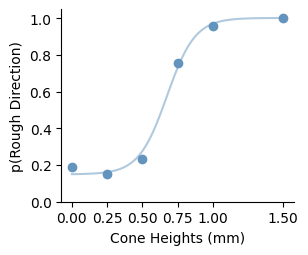

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the sigmoid function
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

def process_mouse_data(mouseID, files):
    list_of_files = [file for file in files if mouseID in file]

    list_of_decisions_for25 = []
    list_of_decisions_for75 = []
    list_of_decisions_for15 = []
    list_of_decisions_for5 = []
    list_of_decisions_for1 = []
    list_of_smooth_decisions = []
    list_of_smoothRS= []

    for sessionID, file in enumerate(list_of_files):

        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial+1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for75.append(trial_data["decision"])
                    #BDY mice 
                elif trial_data.get("coneHeight_1(floor1)") =="1" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for1.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") =="0.25" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for25.append(trial_data["decision"])    
                elif trial_data.get("coneHeight_2(floor2)") == "0.25" and trial_data["floorID"] == "F,2":
                    if '20240729' not in file: ## or 'BDY' would work
                        list_of_decisions_for25.append(trial_data["decision"])
                    
                elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,3":
                    list_of_decisions_for15.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,2":
                    list_of_decisions_for75.append(trial_data["decision"])
                    #BDY mice 
                    
                elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,1":
                    list_of_decisions_for5.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "0,5" and trial_data["floorID"] == "F,2":
                    list_of_decisions_for5.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,2":
                    list_of_decisions_for1.append(trial_data["decision"])
                elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                    list_of_decisions_for15.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                    list_of_decisions_for15.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,4":
                     list_of_smooth_decisions.append(trial_data["decision"])
                elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                
                     list_of_smooth_decisions.append(trial_data["decision"])    
            
                # elif trial_data.get("R/S") and trial_data["floorID"] == "F,4":
                #      list_of_smoothRS.append(trial_data["decision"])
                # elif trial_data.get("R/S") and trial_data["floorID"] == "F,2":
                #      list_of_smoothRS.append(trial_data["decision"])
                    
                    
           
                else: 
                    pass
            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')


    num_correct = list_of_decisions_for25.count('correct')
    total_entries = len(list_of_decisions_for25)
    percentage_correct = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for75.count('correct')
    total_entries = len(list_of_decisions_for75)
    percentage_correct75 = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for15.count('correct')
    total_entries = len(list_of_decisions_for15)
    percentage_correct15 = (num_correct / total_entries) if total_entries > 0 else 0

    num_correct = list_of_decisions_for5.count('correct')
    total_entries = len(list_of_decisions_for5)
    percentage_correct5 = (num_correct / total_entries) if total_entries > 0 else 0

    num_correct = list_of_decisions_for1.count('correct')
    total_entries = len(list_of_decisions_for1)
    percentage_correct1 = (num_correct / total_entries) if total_entries > 0 else 0
    
    num_correct = list_of_smooth_decisions.count('incorrect')
    total_entries = len(list_of_smooth_decisions)
    percentage_correct0 = (num_correct / total_entries) if total_entries > 0 else 0
    
    num_correct = list_of_smoothRS.count('incorrect')
    total_entries = len(list_of_smoothRS)
    percentage_correct0RS = (num_correct / total_entries) * 100 if total_entries > 0 else 0
  

    coenHeights = [0,0.25,0.5, 0.75, 1, 1.5]
    percentages = [percentage_correct0,percentage_correct,percentage_correct5, percentage_correct75,percentage_correct1, percentage_correct15]
    return coenHeights, percentages
   


list_of_mouseID = ['BFL3']
  # Assuming you have a list of all files
plt.figure(figsize=(3, 2.5))
ax = plt.axes()


# Set a uniform color for all mice
uniform_color = '#6294bd'

# Iterate through each mouse ID and plot
for i, mouseID in enumerate(list_of_mouseID):
    coenHeights, percentages = process_mouse_data(mouseID, files)
    
    plt.scatter(coenHeights, percentages, color=uniform_color)
    # Fit the sigmoid function to the data and plot it with the uniform color
    # Fit the sigmoid function to the data with refined bounds
popt, _ = curve_fit(
    sigmoid,
    coenHeights,
    percentages,
    maxfev=10000,
    bounds=([0, min(coenHeights), 0, 0], [1, max(coenHeights), 10, 1])
)

# Generate x and y values for plotting the fitted sigmoid curve
x_values = np.linspace(min(coenHeights), max(coenHeights), 100)
y_values = sigmoid(x_values, *popt)

plt.plot(x_values, y_values, color=uniform_color, linestyle='-', label=f'{mouseID}', alpha = 0.5)



# Finalize plot aesthetics
ax.set_xlabel('Cone Heights (mm)')
ax.set_ylabel('p(Rough Direction)')
ax.set_xticks([0, 0.25, 0.5, 0.75, 1, 1.5])
ax.set_ylim(0, 1.05)
# ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

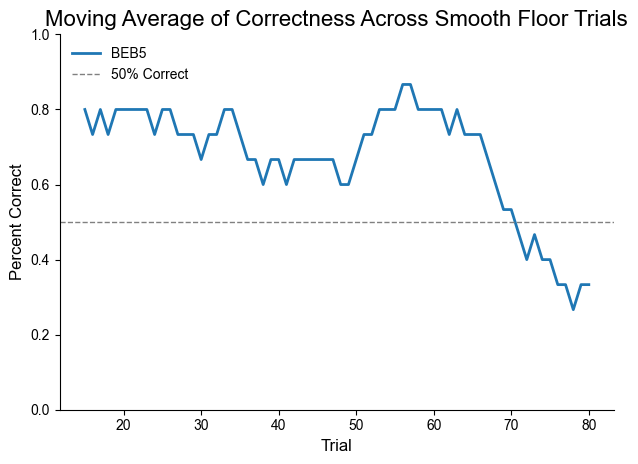

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def process_mouse_data(mouseID, files):
    list_of_files = [file for file in files if mouseID in file]

    list_of_smooth_decisions = []

    for sessionID, file in enumerate(list_of_files):
        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial+1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,4":
                    list_of_smooth_decisions.append(trial_data["decision"])
            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')

    correctness = []
    for decision in list_of_smooth_decisions:
        if decision == "correct":
            correctness.append(1)
        elif decision == "incorrect":
            correctness.append(0)

    if len(correctness) >= 10: 
        # For demonstration, we assume 'movingAverage' is defined elsewhere
        moving_avg = movingAverage(correctness, n=15)

        # Plot all mice on the same figure
        moving_avg_x = range(15, len(correctness) + 1)  # Start from n=15
        plt.plot(moving_avg_x, moving_avg, label= mouseID, linestyle="-", linewidth=2)

    else:
        print(f"Not enough data for moving average for Mouse {mouseID}. Minimum 10 trials required.")

# Test the function for multiple mice
lis_of_mouseID = ["BEB5"]


# Call the function for each mouse and plot on the same figure
for mouse in lis_of_mouseID:
    process_mouse_data(mouse, files)

# Final plot adjustments
plt.xlabel("Trial")
plt.ylabel('Percent Correct')
plt.title("Moving Average of Correctness Across Smooth Floor Trials", fontsize=16)

# Add a dotted line at y = 0.5
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label="50% Correct")

# Customize legend placement
plt.legend( loc="upper left", frameon=False, fontsize=10)

# Disable grid lines to make it cleaner
plt.grid(False)

# Set y-axis to range from 0 to 1 (percent correctness)
plt.ylim(0, 1)

# Remove the top and right spines (top and right border lines)
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


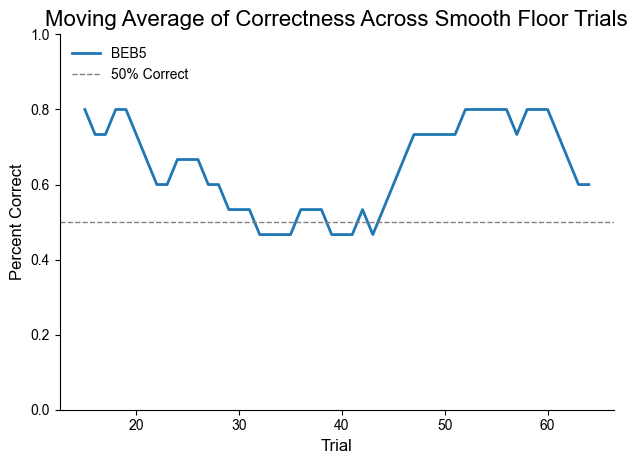

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def process_mouse_data(mouseID, files):
    list_of_files = [file for file in files if mouseID in file]

    list_of_smooth_decisions = []

    for sessionID, file in enumerate(list_of_files):
        data = pd.read_json(file, typ='frame')
        if '20240712' in file:
            for trial in range(len(data[mouseID])):
                trial_key = f'trial{trial+1}'
                try:
                    trial_data = data[mouseID][trial_key]
                    if trial_data["floorID"] == "F,4":
                        list_of_smooth_decisions.append(trial_data["decision"])
                    elif trial_data["floorID"] == "F,2":
                        list_of_smooth_decisions.append(trial_data["decision"])    
                    else:
                        pass    
                except KeyError:
                    print(f'Key error in file {file} at trial {trial_key}')
            else:
                pass

    correctness = []
    for decision in list_of_smooth_decisions:
        if decision == "correct":
            correctness.append(1)
        elif decision == "incorrect":
            correctness.append(0)

    if len(correctness) >= 10: 
        # For demonstration, we assume 'movingAverage' is defined elsewhere
        moving_avg = movingAverage(correctness, n=15)

        # Plot all mice on the same figure
        moving_avg_x = range(15, len(correctness) + 1)  # Start from n=15
        plt.plot(moving_avg_x, moving_avg, label= mouseID, linestyle="-", linewidth=2)

    else:
        print(f"Not enough data for moving average for Mouse {mouseID}. Minimum 10 trials required.")

# Test the function for multiple mice
lis_of_mouseID = ["BEB5"]


# Call the function for each mouse and plot on the same figure
for mouse in lis_of_mouseID:
    process_mouse_data(mouse, files)

# Final plot adjustments
plt.xlabel("Trial")
plt.ylabel('Percent Correct')
plt.title("Moving Average of Correctness Across Smooth Floor Trials", fontsize=16)

# Add a dotted line at y = 0.5
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label="50% Correct")

# Customize legend placement
plt.legend( loc="upper left", frameon=False, fontsize=10)

# Disable grid lines to make it cleaner
plt.grid(False)

# Set y-axis to range from 0 to 1 (percent correctness)
plt.ylim(0, 1)

# Remove the top and right spines (top and right border lines)
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

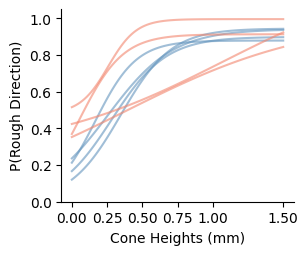

In [199]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x - b))) + d

def process_mouse_data(mouseID, files, injection_type):
    list_of_files = [file for file in files if mouseID in file]

    list_of_decisions_for25 = []
    list_of_decisions_for75 = []
    list_of_decisions_for15 = []
    list_of_decisions_for5 = []
    list_of_decisions_for1 = []
    list_of_smooth_decisions = []

    for sessionID, file in enumerate(list_of_files):
        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial+1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("Injection") == injection_type:  # Check injection type
                    if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for75.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for1.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.25" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for25.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.25" and trial_data["floorID"] == "F,2":
                        if '20240729' not in file:
                            list_of_decisions_for25.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for75.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for5.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.5" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for5.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for1.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,4":
                        list_of_smooth_decisions.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                        list_of_smooth_decisions.append(trial_data["decision"])

            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')


    num_correct = list_of_decisions_for25.count('correct')
    total_entries = len(list_of_decisions_for25)
    percentage_correct = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for75.count('correct')
    total_entries = len(list_of_decisions_for75)
    percentage_correct75 = (num_correct / total_entries)  if total_entries > 0 else 0

    num_correct = list_of_decisions_for15.count('correct')
    total_entries = len(list_of_decisions_for15)
    percentage_correct15 = (num_correct / total_entries) if total_entries > 0 else 0

    num_correct = list_of_decisions_for5.count('correct')
    total_entries = len(list_of_decisions_for5)
    percentage_correct5 = (num_correct / total_entries) if total_entries > 0 else 0

    num_correct = list_of_decisions_for1.count('correct')
    total_entries = len(list_of_decisions_for1)
    percentage_correct1 = (num_correct / total_entries) if total_entries > 0 else 0
    
    num_correct = list_of_smooth_decisions.count('incorrect')
    total_entries = len(list_of_smooth_decisions)
    percentage_correct0 = (num_correct / total_entries) if total_entries > 0 else 0
    
  

    coenHeights = [0,0.25,0.5, 0.75, 1, 1.5]
    percentages = [percentage_correct0,percentage_correct,percentage_correct5, percentage_correct75,percentage_correct1, percentage_correct15]
    return coenHeights, percentages
   


# Example Data
list_of_mouseID = ['BHH3', 'BHH6', 'BHH4','BHH2']

plt.figure(figsize=(3, 2.5))
ax = plt.axes()

# Plot for Injection A
for mouseID in list_of_mouseID:
    cone_heights_A, percentages_A = process_mouse_data(mouseID, files, "A")
    color_A = '#6294bd'  # Blue color for Injection A
    # plt.scatter(cone_heights_A, percentages_A, color=color_A, label=f'{mouseID} (Injection A)')
    
    # Fit sigmoid curve
    popt_A, _ = curve_fit(sigmoid, cone_heights_A, percentages_A, maxfev=10000, bounds=([0, min(cone_heights_A), 0, 0], [1, max(cone_heights_A), 10, 1]))
    x_values_A = np.linspace(min(cone_heights_A), max(cone_heights_A), 100)
    y_values_A = sigmoid(x_values_A, *popt_A)
    plt.plot(x_values_A, y_values_A, color=color_A, linestyle='-', alpha=0.6)

# Plot for Injection B
for mouseID in list_of_mouseID:
    cone_heights_B, percentages_B = process_mouse_data(mouseID, files, "B")
    color_B = '#f2856d'  # Red color for Injection B
    # plt.scatter(cone_heights_B, percentages_B, color=color_B, label=f'{mouseID} (Injection B)')
    
    # Fit sigmoid curve
    popt_B, _ = curve_fit(sigmoid, cone_heights_B, percentages_B, maxfev=10000, bounds=([0, min(cone_heights_B), 0, 0], [1, max(cone_heights_B), 10, 1]) )
    x_values_B = np.linspace(min(cone_heights_B), max(cone_heights_B), 100)
    y_values_B = sigmoid(x_values_B, *popt_B)
    plt.plot(x_values_B, y_values_B, color=color_B, linestyle='-', alpha=0.6)

# Finalize plot
ax.set_xlabel('Cone Heights (mm)')
ax.set_ylabel('P(Rough Direction)')
ax.set_xticks([0, 0.25, 0.5, 0.75, 1, 1.5])
ax.set_ylim(0, 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

0.8695652173913043
0.7435897435897436
0.8178571428571428
0.6881720430107527
0.7734375
0.7553191489361702
0.8313253012048193
0.7383177570093458


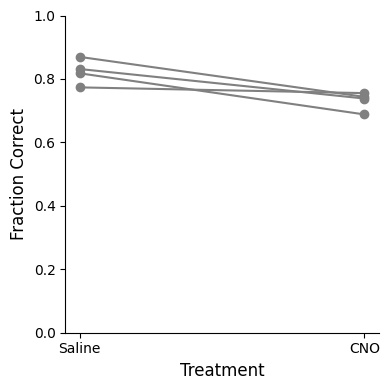

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to process mouse data and calculate percentage correct
def process_mouse_data(mouseID, files, injection_type):
    list_of_files = [file for file in files if mouseID in file]
    list_of_decisions_for15 = []

    for file in list_of_files:
        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial + 1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("Injection") == injection_type:  # Check injection type
                    if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.25" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.25" and trial_data["floorID"] == "F,2":
                        if '20240729' not in file:
                            list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.5" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,4":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                        list_of_decisions_for15.append(trial_data["decision"])
            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')

    num_correct = list_of_decisions_for15.count('correct')
    total_entries = len(list_of_decisions_for15)
    percentages = (num_correct / total_entries)  if total_entries > 0 else 0  # Convert to percentage
    print(percentages)
    return percentages
# Example data
list_of_mouseID = ['BHH4', 'BHH6', 'BHH2', 'BHH3']
injection_types = ['A', 'B']
injection_labels = ['Saline', 'CNO']  # Updated labels for x-axis

# Plotting
plt.figure(figsize=(4, 4))  # Narrower graph with equal width and height

for mouseID in list_of_mouseID:
    percentages = []
    for injection in injection_types:
        percentage = process_mouse_data(mouseID, files, injection)
        percentages.append(percentage)
    # Plot with the same color for all lines (grey)
    plt.plot(injection_labels, percentages, marker='o', linestyle='-', color='grey')

# Customize the graph
plt.xlabel('Treatment', fontsize=12)
plt.ylabel('Fraction Correct', fontsize=12)
plt.ylim(0, 1)  # Adjust y-axis range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Finalize and display the graph
plt.tight_layout()
plt.show()


C:\Users\ewkent\AppData\Local\Temp\ipykernel_13608\2419974165.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(list_of_mouseID))  # 'tab10' gives 10 distinct colors


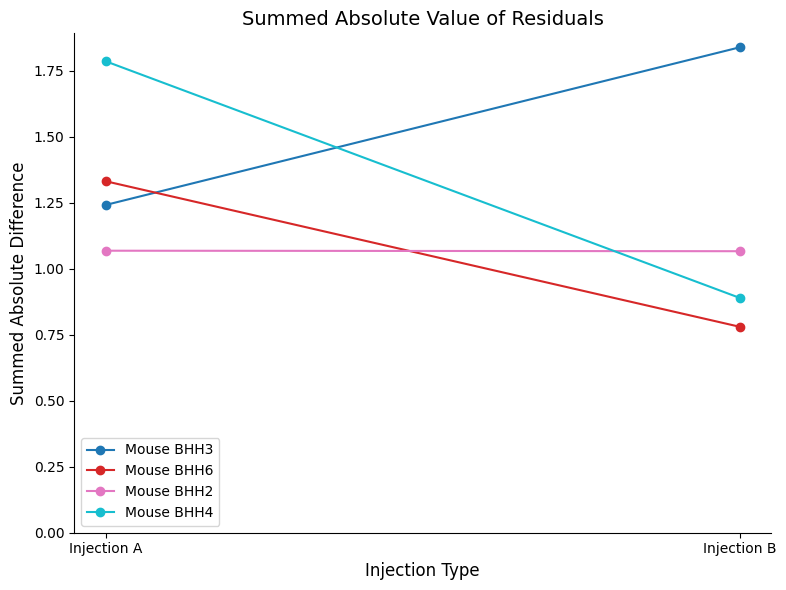

In [173]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sigmoid function definition
def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x - b))) + d

def process_mouse_data(mouseID, files, injection_type):
    list_of_files = [file for file in files if mouseID in file]

    list_of_decisions_for25 = []
    list_of_decisions_for75 = []
    list_of_decisions_for15 = []
    list_of_decisions_for5 = []
    list_of_decisions_for1 = []
    list_of_smooth_decisions = []

    for sessionID, file in enumerate(list_of_files):
        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial+1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("Injection") == injection_type:  # Check injection type
                    if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for75.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for1.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.25" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for25.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.25" and trial_data["floorID"] == "F,2":
                        if '20240729' not in file:
                            list_of_decisions_for25.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for75.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,1":
                        list_of_decisions_for5.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.5" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for5.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,2":
                        list_of_decisions_for1.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,4":
                        list_of_smooth_decisions.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                        list_of_smooth_decisions.append(trial_data["decision"])

            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}') 


    # Calculate percentages for each cone height
    coenHeights = [0, 0.25, 0.5, 0.75, 1, 1.5]
    percentages = [
        list_of_decisions_for25.count('correct') / len(list_of_decisions_for25) if len(list_of_decisions_for25) > 0 else 0,
        list_of_decisions_for75.count('correct') / len(list_of_decisions_for75) if len(list_of_decisions_for75) > 0 else 0,
        list_of_decisions_for5.count('correct') / len(list_of_decisions_for5) if len(list_of_decisions_for5) > 0 else 0,
        list_of_decisions_for15.count('correct') / len(list_of_decisions_for15) if len(list_of_decisions_for15) > 0 else 0,
        list_of_decisions_for1.count('correct') / len(list_of_decisions_for1) if len(list_of_decisions_for1) > 0 else 0,
        list_of_smooth_decisions.count('incorrect') / len(list_of_smooth_decisions) if len(list_of_smooth_decisions) > 0 else 0,
    ]
    
    return coenHeights, percentages

# Example Data
list_of_mouseID = ['BHH3', 'BHH6', 'BHH2', 'BHH4']  # Multiple mouse IDs

# Injection A and B differences
mouse_differences_A = []
mouse_differences_B = []

# Create colormap to assign unique colors for each mouse
colors = cm.get_cmap('tab10', len(list_of_mouseID))  # 'tab10' gives 10 distinct colors

# Loop over each mouse and calculate differences for Injection A and B
for i, mouseID in enumerate(list_of_mouseID):
    # Injection A
    cone_heights_A, percentages_A = process_mouse_data(mouseID, files, "A")
    popt_A, _ = curve_fit(sigmoid, cone_heights_A, percentages_A, maxfev=10000, bounds=([0, min(cone_heights_A), 0, 0], [1, max(cone_heights_A), 10, 1]))
    predicted_A = [sigmoid(x, *popt_A) for x in cone_heights_A]
    differences_A = [abs(pred - true) for pred, true in zip(predicted_A, percentages_A)]
    mouse_differences_A.append(round(sum(differences_A), 6))  # Round to 6 decimal places

    # Injection B
    cone_heights_B, percentages_B = process_mouse_data(mouseID, files, "B")
    popt_B, _ = curve_fit(sigmoid, cone_heights_B, percentages_B, maxfev=10000, bounds=([0, min(cone_heights_B), 0, 0], [1, max(cone_heights_B), 10, 1]))
    predicted_B = [sigmoid(x, *popt_B) for x in cone_heights_B]
    differences_B = [abs(pred - true) for pred, true in zip(predicted_B, percentages_B)]
    mouse_differences_B.append(round(sum(differences_B), 6))  # Round to 6 decimal places

# Prepare the data for plotting
injections = ['Injection A', 'Injection B']
differences_A_for_plot = []
differences_B_for_plot = []

# Loop over each mouse's differences to create separate lists
for i, mouseID in enumerate(list_of_mouseID):
    differences_A_for_plot.append(mouse_differences_A[i])
    differences_B_for_plot.append(mouse_differences_B[i])

# Plot differences for each injection type, for each mouse
plt.figure(figsize=(8, 6))

# Plotting data for each mouse with unique colors
for i, mouseID in enumerate(list_of_mouseID):
    plt.plot(injections, [mouse_differences_A[i], mouse_differences_B[i]], 
             label=f'Mouse {mouseID}', marker='o', linestyle='-', color=colors(i))

# Customize the plot
plt.title("Summed Absolute Value of Residuals", fontsize=14)
plt.xlabel("Injection Type", fontsize=12)
plt.ylabel("Summed Absolute Difference", fontsize=12)
plt.legend(fontsize=10)

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set the background to white
plt.gcf().set_facecolor('white')

# Set y-axis to start from zero
plt.ylim(bottom=0)

# Show the plot
plt.tight_layout()
plt.show()




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to process mouse data and calculate percentage correct
def process_mouse_data(mouseID, files, injection_type):
    list_of_files = [file for file in files if mouseID in file]
    list_of_decisions_for15 = []

    for file in list_of_files:
        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial + 1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("Injection") == injection_type:  # Check injection type
                    if trial_data.get("coneHeight_1(floor1)") == "0.75" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,4":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                        list_of_decisions_for15.append(trial_data["decision"])
            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')

    num_correct = list_of_decisions_for15.count('correct')
    total_entries = len(list_of_decisions_for15)
    percentages = (num_correct / total_entries) * 100 if total_entries > 0 else 0  # Convert to percentage
    return percentages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
list_of_mouseID = ['BHH2', 'BHH6', 'BHH4', 'BHH3']
injection_types = ['A', 'B']
injection_labels = ['Saline', 'CNO']  # Updated labels for x-axis
colors = ['#4CAF50', '#FF5733']  # Green for Saline, Orange for CNO


# Plotting
plt.figure(figsize=(5, 4))

for idx, mouseID in enumerate(list_of_mouseID):
    percentages = []
    for injection in injection_types:
        percentage = process_mouse_data(mouseID, files, injection)
        percentages.append(percentage)
    # Scatter plot for this mouse
    plt.plot(injection_labels, percentages, marker=markers[idx], linestyle='-', label=f'Mouse {mouseID}')

# Customize the graph
plt.xlabel('Injection Type', fontsize=12)
plt.ylabel('Percentage Correct (%)', fontsize=12)

plt.ylim(0, 100)  # Adjust y-axis range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, title='Mouse ID')

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Finalize and display the graph
plt.tight_layout()
plt.show()


0.9644970414201184
0.7202072538860104
0.8888888888888888
0.5877862595419847
0.8407079646017699
0.8424657534246576
0.9080459770114943
0.8303030303030303


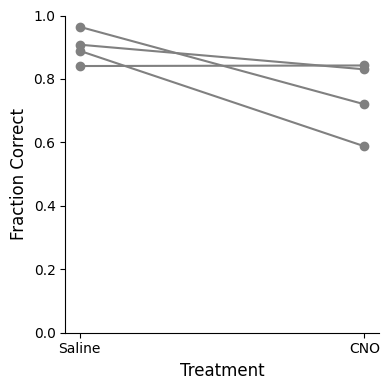

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to process mouse data and calculate percentage correct
def process_mouse_data(mouseID, files, injection_type):
    list_of_files = [file for file in files if mouseID in file]
    list_of_decisions_for15 = []

    for file in list_of_files:
        data = pd.read_json(file, typ='frame')
        for trial in range(len(data[mouseID])):
            trial_key = f'trial{trial + 1}'
            try:
                trial_data = data[mouseID][trial_key]
                if trial_data.get("Injection") == injection_type:  # Check injection type
                    if trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "1" and trial_data["floorID"] == "F,3":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_2(floor2)") == "0.75" and trial_data["floorID"] == "F,4":
                        list_of_decisions_for15.append(trial_data["decision"])
                    elif trial_data.get("coneHeight_1(floor1)") == "0.5" and trial_data["floorID"] == "F,4":
                        list_of_decisions_for15.append(trial_data["decision"])
            except KeyError:
                print(f'Key error in file {file} at trial {trial_key}')

    num_correct = list_of_decisions_for15.count('correct')
    total_entries = len(list_of_decisions_for15)
    percentages = (num_correct / total_entries)  if total_entries > 0 else 0  # Convert to percentage
    print(percentages)
    return percentages
# Example data
list_of_mouseID = ['BHH4', 'BHH6', 'BHH2', 'BHH3']
injection_types = ['A', 'B']
injection_labels = ['Saline', 'CNO']  # Updated labels for x-axis

# Plotting
plt.figure(figsize=(4, 4))  # Narrower graph with equal width and height

for mouseID in list_of_mouseID:
    percentages = []
    for injection in injection_types:
        percentage = process_mouse_data(mouseID, files, injection)
        percentages.append(percentage)
    # Plot with the same color for all lines (grey)
    plt.plot(injection_labels, percentages, marker='o', linestyle='-', color='grey')

# Customize the graph
plt.xlabel('Treatment', fontsize=12)
plt.ylabel('Fraction Correct', fontsize=12)
plt.ylim(0, 1)  # Adjust y-axis range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Finalize and display the graph
plt.tight_layout()
plt.show()